In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

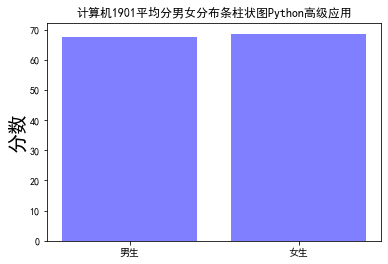

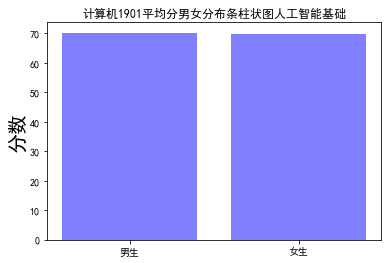

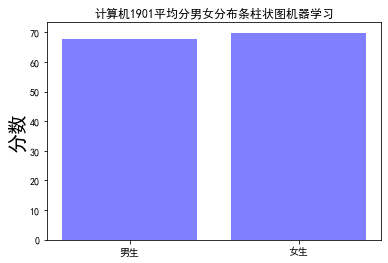

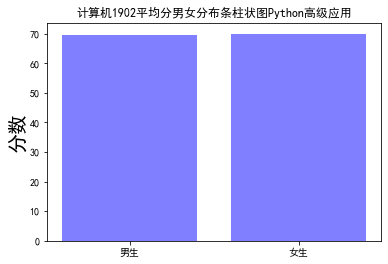

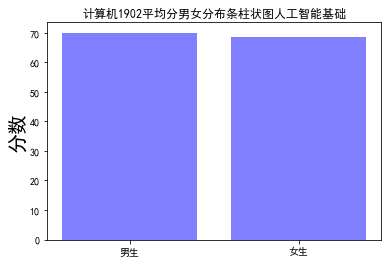

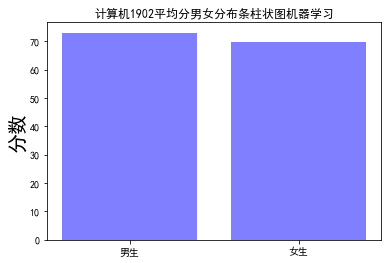

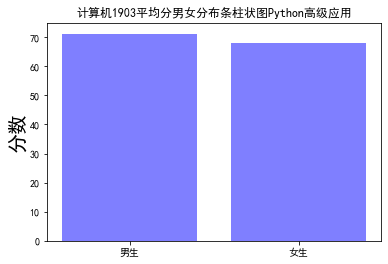

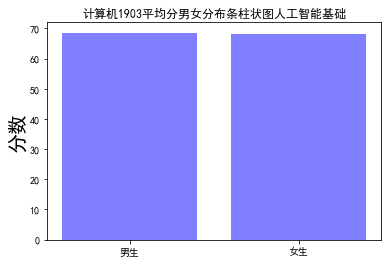

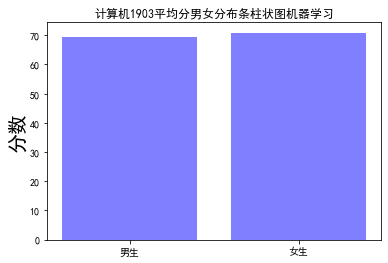

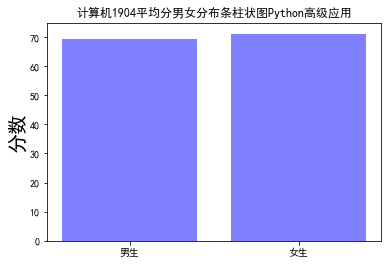

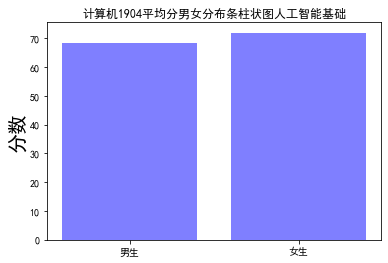

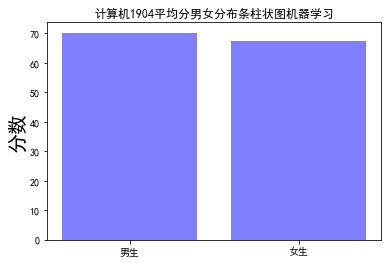

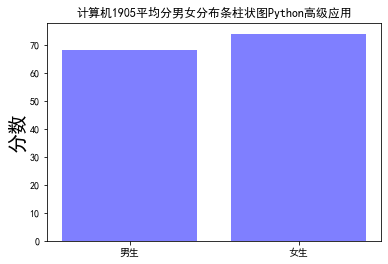

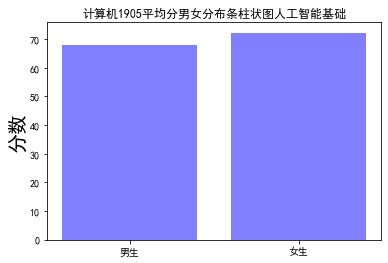

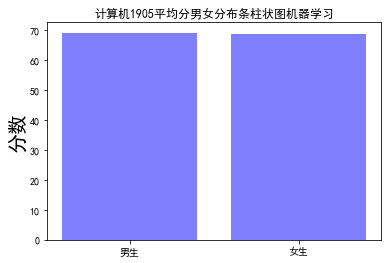

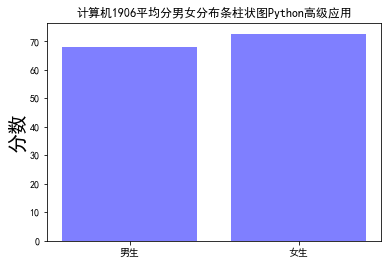

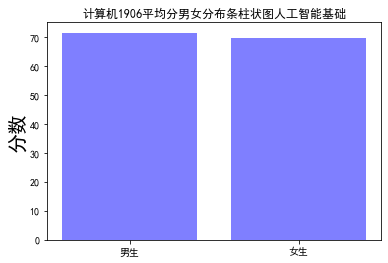

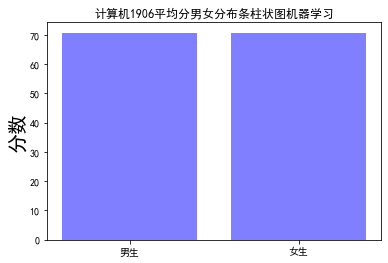

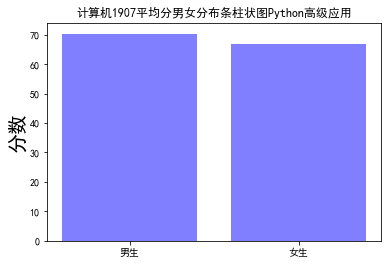

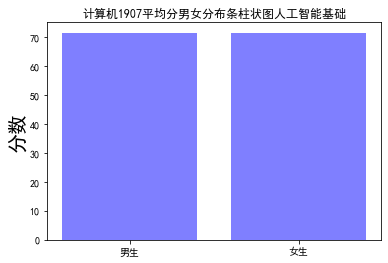

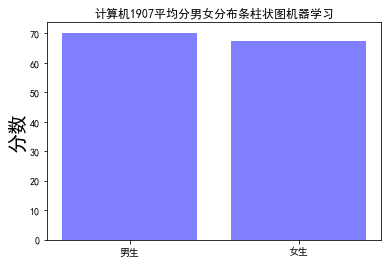

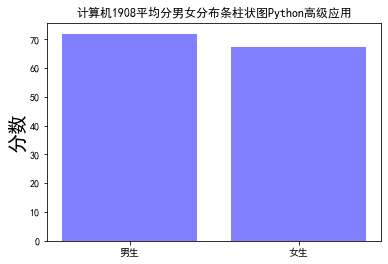

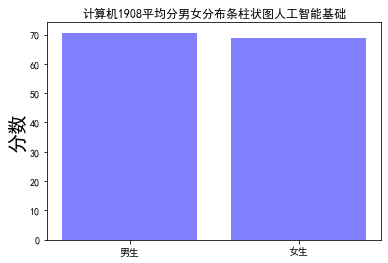

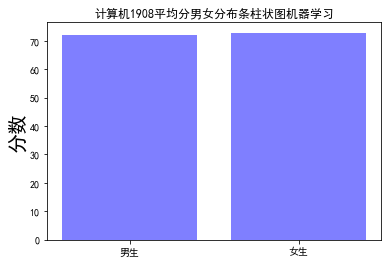

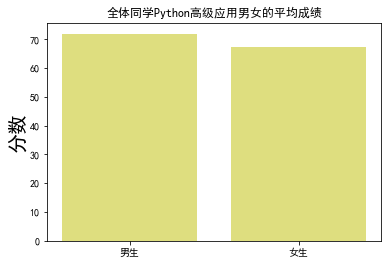

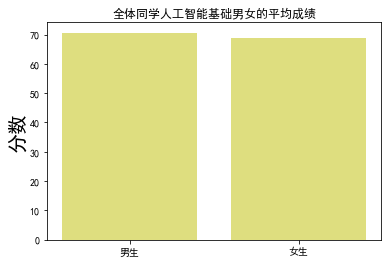

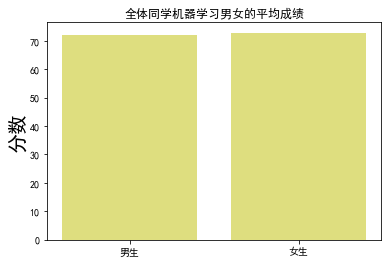

In [24]:
for i in range(1, 9):#循环1~8个班的数据
    filename = "计算机190" + str(i) + ".csv"  #创建以各班级命名的文件名
    classname = "计算机190" + str(i)
    with open(filename,"r") as f:#读取文件数据
        data = np.loadtxt(f,str,delimiter = ',')
    for j in range(3):#循环一个班的三列成绩
        t_male = np.where(data == '男')#选择男生
        m_data = data[t_male[0]]#只取所在行
        m_data_score = m_data[:,3+j].astype(dtype = 'int16')#选第4列的数据，并转换类型
        m = np.mean(m_data_score)#求出男生该科的平均成绩
        t_female = np.where(data == '女')#选择女生
        fm_data = data[t_female[0]]#只取所在行
        fm_data_score = fm_data[:,3+j].astype(dtype = 'int16')#选第4列的数据，并转换类型
        w = np.mean(fm_data_score)#求出女生该科的平均成绩
        x = ['男生','女生']#命名横坐标
        y = [m,w]#纵坐标为计算出的男生女生平均成绩
        plt.title(classname+"平均分男女分布条柱状图"+data[0,j+3])#分别命名各个班级各科目的条柱状图
        plt.ylabel("分数",fontproperties = 'SimHei',fontsize = 20)#纵坐标编写字体及大小
        plt.bar(x, y, alpha=0.5, color='b')#编写条柱状图，颜色为蓝，颜色深度为0.5
        plt.show()
#还需要整体成绩的，分性别的图，有三个科目，故可以先循环三个科目数据，再统计9个班的平均分，最后作图，并依次画出三个科目的整体男女分布平均成绩的条形图
for n in range(3):#利用循环最后输出全体同学的三科各条柱状图
    for ii in range(1, 9):#循环8个班成绩
        with open(filename,"r") as f:
            data = np.loadtxt(f,str,delimiter = ',')
        t_male = np.where(data == '男')#筛选男生
        m_data = data[t_male[0]]#只取所在行
        m_data_score = []
        m_data_score.append(m_data[:,3+n].astype(dtype = 'int16'))#追加第4列的数据到列表里便于后面求平均值，并转换类型
        t_female = np.where(data == '女')#筛选女生
        fm_data = data[t_female[0]]#只取所在行
        fm_data_score = []
        fm_data_score.append(fm_data[:,3+n].astype(dtype = 'int16'))#选第4列的数据到列表里便于后面求平均值，并转换类型
    x = ['男生','女生']
    y = [np.mean(m_data_score),np.mean(fm_data_score)]
    plt.title('全体同学'+data[0,n+3]+'男女的平均成绩')#分别命名各科目的条柱状图
    plt.ylabel("分数",fontproperties = 'SimHei',fontsize = 20)#编写字体及大小
    plt.bar(x, y, alpha=0.5, color='y')#编写条柱状图，颜色为黄，颜色深度为0.5
    plt.show()

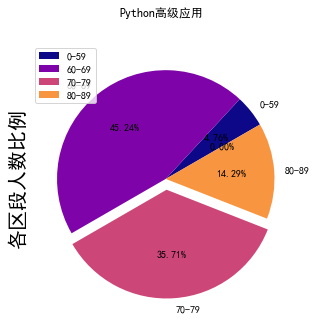

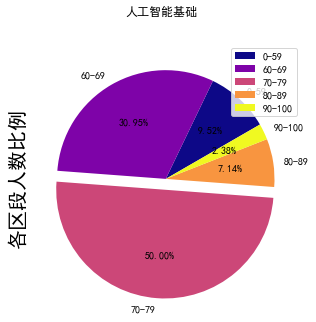

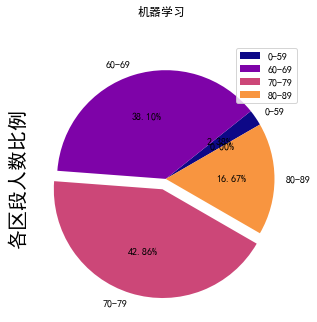

In [30]:
for iii in range(3):#循环三列成绩
    score_name = "score" + str(iii)
    score_name = []
    for n in range(1, 9):#依次循环8个班
        for jjj in data[1:]:
            score_name.append(int(jjj[3+iii])) #读取每一个班的成绩，加进列表
    gk = 0;jg = 0;lh = 0;bc = 0;yx = 0#所有人数一开始均为0
    for i in score_name:#根据成绩列表，依次判断是优秀，不错，良好，挂科
        if i < 60:
            gk += 1
        elif i>= 60 and i < 70:
            jg += 1
        elif i>= 70 and i < 80:
            lh += 1
        elif i>= 80 and i < 90:
            bc += 1
        elif i>= 90 and i <= 100:
            yx += 1
    x = ["0-59", "60-69", "70-79", "80-89", "90-100"] #设置图的横纵坐标
    y = [gk,jg,lh,bc,yx]#纵坐标为优秀，不错，良好，挂科五个区间的人数
    file = open('data_1.csv', 'w',newline='')
    w = csv.writer(file)
    w.writerow(x)#写入文件
    w.writerow(y)#写入文件
    file.close()
    data_1 = pd.read_csv('data_1.csv')
    data_2 = data_1[['0-59','60-69','70-79','80-89','90-100']].sum()#分别求和
    data_2.plot.pie(subplots= True,figsize=(5,5),autopct='%.2f%%',title = data[0,3+iii],radius = 1,startangle =30,explode=(0,0,0.1,0,0),legend=True,colormap = 'plasma')
    #分成三个类，五个区间，绘制饼图，plasma用来可视化深度图，产生视差图
    plt.ylabel("各区段人数比例",fontproperties = 'SimHei',fontsize = 20)#编写字体及大小
    plt.show()